In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
dataset = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

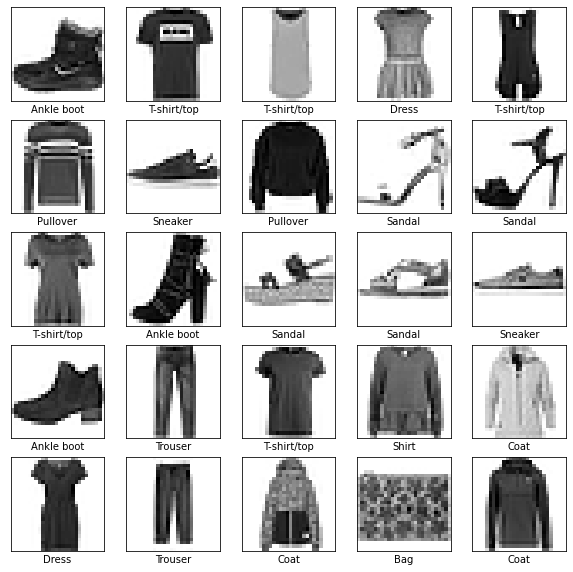

In [5]:
X_train = X_train/255.
X_test = X_test/255.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
Layers = [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(500),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(300),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Activation('softmax')
]

In [7]:
model = tf.keras.Sequential(Layers)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['Acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 activation_1 (Activation)   (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 activation_2 (Activation)   (None, 100)               0

In [12]:
model.layers

In [17]:
model.layers[1].name

'dense'

In [20]:
wh,wb = model.layers[1].get_weights()

In [21]:
wh.shape

(784, 500)

In [22]:
wb.shape

(500,)

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6303 - Acc: 0.7724 - val_loss: 0.5942 - val_Acc: 0.8129
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4945 - Acc: 0.8270 - val_loss: 0.4850 - val_Acc: 0.8326
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4725 - Acc: 0.8357 - val_loss: 0.4945 - val_Acc: 0.8271
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4886 - Acc: 0.8323 - val_loss: 0.5171 - val_Acc: 0.8228
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4308 - Acc: 0.8477 - val_loss: 0.4485 - val_Acc: 0.8432
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4267 - Acc: 0.8503 - val_loss: 0.4987 - val_Acc: 0.8267
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4560 - Acc: 0.8455 - val_loss: 0.4887 - val_Acc: 0.8381
Epoch 8/20
1875/1875 [==============================] - 8s 4ms

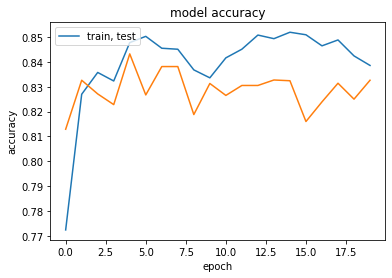

In [11]:
plt.plot(history.history['Acc'])
plt.plot(history.history['val_Acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train, test'], loc='upper left')
plt.show()

In [24]:
y_pred=[]
y_pred[1:10]=model.predict(X_test[1:10])

In [38]:
result = []
for i in y_pred:
  result.append(np.argmax(i))

In [42]:
for i in result:
  print(class_names[i])

Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


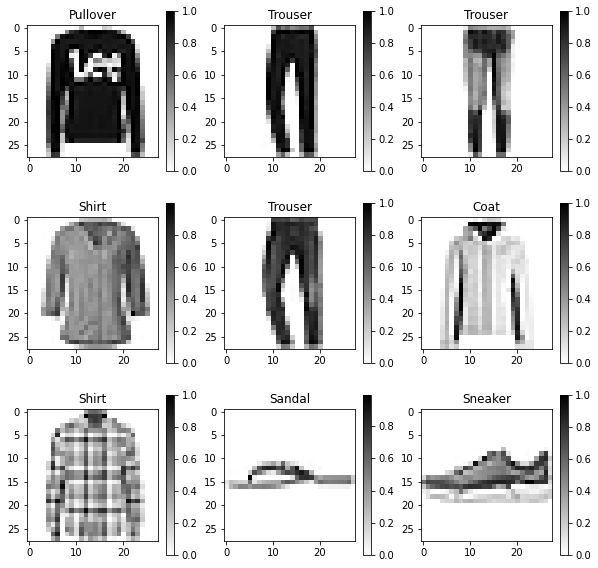

In [45]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i+1], cmap=plt.cm.binary)
  plt.colorbar()
  plt.title(class_names[result[i]])
plt.show()